In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel('cleaned_data.xlsx')
df = pd.DataFrame(data)
df2 = pd.DataFrame(data)
df.head()

,Property_Name,Property_id,Property_type,Property_status,Price_per_unit_area,Posted_On,Project_URL,builder_id,Builder_name,Property_building_status,...,is_furnished,listing_domain_score,is_plot,is_RERA_registered,is_Apartment,is_ready_to_move,is_commercial_Listing,is_PentaHouse,is_studio,Listing_Category
0,Arkiton Luxe,15446514,Apartment,Under Construction,4285,1 day ago,https://www.makaan.com/ahmedabad/arkiton-life-...,100563465,Arkiton life Space,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
1,Keshav Akshar Ocean Pearl,15367414,Apartment,Under Construction,7000,2 days ago,https://www.makaan.com/ahmedabad/keshav-naraya...,100009433,Keshav Narayan Group,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell
2,Vishwa Opulence,14683118,Apartment,Ready to move,5752,2 days ago,https://www.makaan.com/ahmedabad/vishwa-develo...,100207731,Vishwa Developers Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
3,Satyam Sarjan,5476295,Apartment,Ready to move,2486,5 days ago,https://www.makaan.com/ahmedabad/satyam-develo...,101303,Satyam Developers,ACTIVE,...,Unfurnished,4.0,False,False,True,True,False,False,False,sell
4,Navkar Sunflower,15477040,Apartment,Under Construction,5324,8 days ago,https://www.makaan.com/ahmedabad/navkar-buildc...,1484209,Navkar Buildcon Ahmedabad,ACTIVE,...,Unfurnished,4.0,False,True,True,False,False,False,False,sell


In [2]:
data['Price_per_unit_area'] = data['Price_per_unit_area'].astype(str)
data['Price_per_unit_area'] = data['Price_per_unit_area'].str.replace(',', '').astype(int)

data['Price'] = data['Price'].astype(str)
data['Price'] = data['Price'].str.replace(',', '').astype(int)

In [3]:
data['Size'].astype(str)
data['Size'] = data['Size'].str.removesuffix(' sq ft')
data['Size'] = data['Size'].str.replace(',', '').astype(int)

## Q1. Every investor has different budget ranges, so divide the overall opportunities into three ranges.

#### 1. Distribution of Houses in Each Range

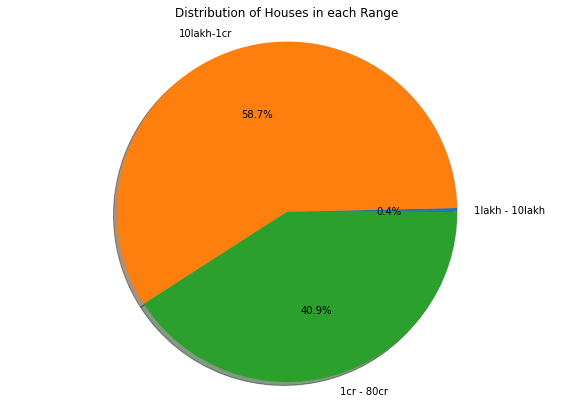

In [4]:
ranges = ['1lakh - 10lakh', '10lakh-1cr', '1cr - 80cr']
range1 = data[data['Price'] <= 1000000]
range2 = data[(data['Price'] > 1000000) & (data['Price'] <= 10000000)]
range3 = data[(data['Price'] > 10000000) & (data['Price'] <= 800000000)]
values = [len(range1), len(range2), len(range3)]
plt.figure(figsize=(10, 7))
plt.pie(values, labels=ranges, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Distribution of Houses in each Range')
plt.show()

We have divided all the property available into 3 ranges: 
- (1 Lakh - 10 Lakh)
- (10 Lakh - 1 Crore)
- (1 Crore - 80 Crore)

We can observe that only 0.4% of the properties are available in the range Rs.1Lakh - 10 Lakh. The range 10 Lakhs - 1 Crore contains most number of properties which is 58.7%.

#### 2. Median Area of Property in Each Range

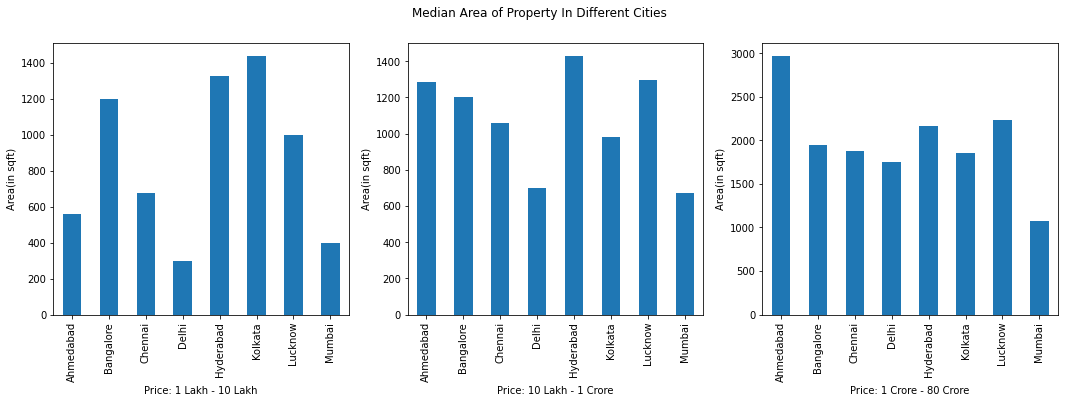

In [5]:
plt.subplot(1, 3, 1)
c = data[data['Price'] <= 1000000].groupby('City_name')['Size'].median().plot(kind='bar', figsize=(18, 5))
plt.ylabel('Area(in sqft)')
plt.xlabel('Price: 1 Lakh - 10 Lakh')
plt.subplot(1, 3, 2)
c = data[(data['Price'] > 1000000) & (data['Price'] <= 10000000)].groupby('City_name')['Size'].median().plot(kind='bar')
plt.ylabel('Area(in sqft)')
plt.xlabel('Price: 10 Lakh - 1 Crore')
plt.subplot(1, 3, 3)
c = data[(data['Price'] > 10000000) & (data['Price'] <= 800000000)].groupby('City_name')['Size'].median().plot(kind='bar')
plt.ylabel('Area(in sqft)')
plt.xlabel('Price: 1 Crore - 80 Crore')
plt.suptitle('Median Area of Property In Different Cities')
plt.show()

We observe the median area of properties in different cities grouped according to price range. It can be observed that in the price range of Rs. 1 Lakh - 10 Lakh, Kolkata offers the highest median area, in the price range of Rs. 10 Lakh - 1 Crore, Hyderabad offers the highest median area, and in the price range of Rs. 1 Crore - 80 Crore, Ahmedabad offers the highest median area.

#### 3. Distribution of Houses in a price range

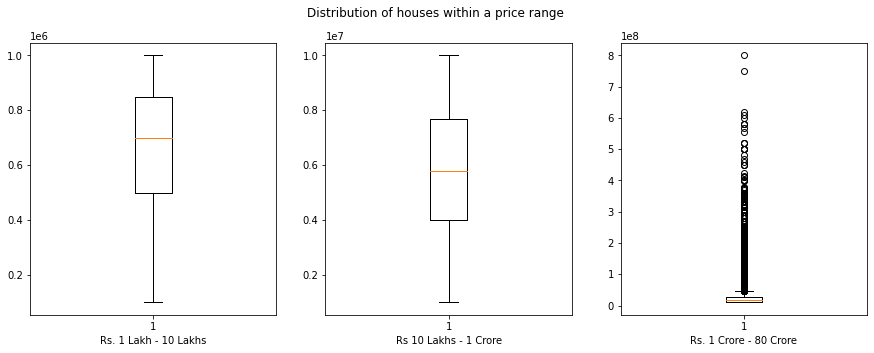

In [6]:
c1 = data[data['Price'] <= 1000000].Price.tolist()
c2 = data[(data['Price'] > 1000000) & (data['Price'] <= 10000000)].Price.tolist()
c3 = data[(data['Price'] > 10000000) & (data['Price'] <= 800000000)].Price.tolist()
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(c1)
plt.xlabel('Rs. 1 Lakh - 10 Lakhs')
plt.subplot(1, 3, 2)
plt.boxplot(c2)
plt.xlabel('Rs 10 Lakhs - 1 Crore')
plt.subplot(1, 3, 3)
plt.boxplot(c3)
plt.xlabel('Rs. 1 Crore - 80 Crore')
plt.suptitle('Distribution of houses within a price range')
plt.show()

We observe the distribution of houses within these price ranges using box plots.
- In the range Rs. 1 Lakhs - 10 Lakhs, the median price is approx Rs. 7 Lakhs, and middle 50% of the properties are spread between 5 Lakhs to 8 Lakhs
- In the range Rs. 10 Lakhs - 1 Crore, the median price is approx Rs. 60 Lakhs and the middle 50% of the properties are spread between 40 Lakhs and 80 Lakhs.
- In the range Rs. 1 Crore - 80 Crore, the median price is approx Rs. 2 Crores, and the middle 50% of the properties are spread between 1 Crore - 3 Crores.

We observe that the range Rs. 1 Crore - 80 Crore is extremely skewed since most of the houses are in the range of Rs. 1 Crore - Rs. 3 Crore and a small number of houses have extremely high prices.

## Q2. Some investors are interested only in tech-emerging cities like Hyderabad, Banglore, and Chennai with ready-to-move properties for leasing purposes.

In [7]:
hyderabad = data[(data['City_name'] == 'Hyderabad') & (data['is_ready_to_move'] == True)]
bangalore = data[(data['City_name'] == 'Bangalore') & (data['is_ready_to_move'] == True)]
chennai = data[(data['City_name'] == 'Chennai') & (data['is_ready_to_move'] == True)]

#### 1. No. of Properties in Tech-Emerging Cities

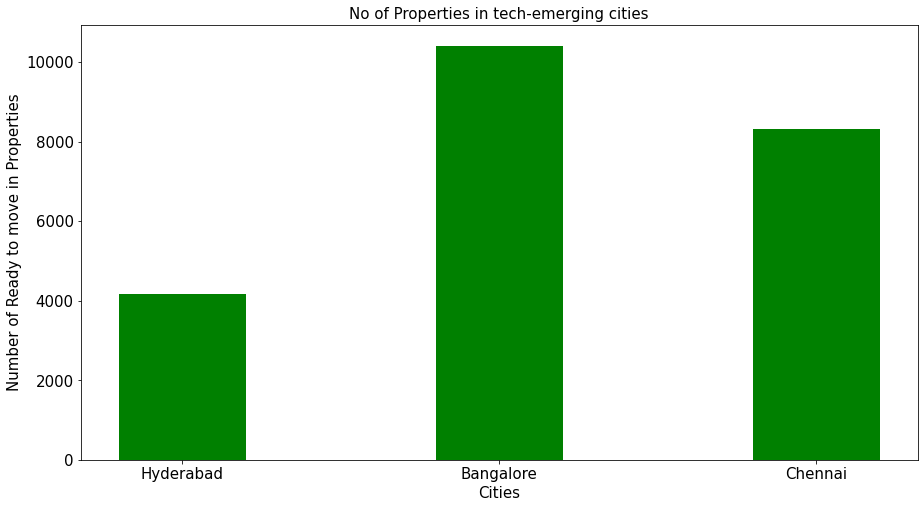

In [8]:
cities = ['Hyderabad', 'Bangalore', 'Chennai']
values = [len(hyderabad), len(bangalore), len(chennai)]
plt.figure(figsize=(15, 8))
plt.bar(cities, values, color='green', width=0.4)
plt.xlabel('Cities', fontsize=15)
plt.ylabel('Number of Ready to move in Properties', fontsize=15)
plt.title('No of Properties in tech-emerging cities', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

We observe that among the tech-emerging cities, Bangalore provides the most oppurtunities with 10 thousand (approx) ready to move in properties while Hyderabad offers only 4000 ready to move in properties.

#### 2. Median Price Vs BHK in Tech-Emerging Cities

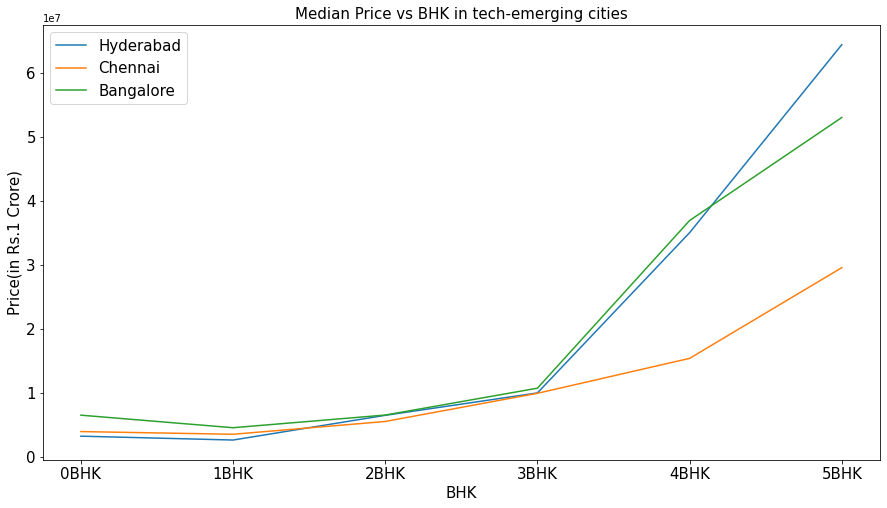

In [9]:
d1 = hyderabad.groupby('No_of_BHK')['Price'].median().reset_index(name='Median_Price').Median_Price.values.tolist()
del d1[10]
del d1[9]
del d1[4]
del d1[3]
del d1[2]

d2 = chennai.groupby('No_of_BHK')['Price'].median().reset_index(name='Median_Price').Median_Price.values.tolist()
del d2[8]
del d2[5]
del d2[2]

d3 = bangalore.groupby('No_of_BHK')['Price'].median().reset_index(name='Median_Price').Median_Price.values.tolist()
del d3[11]
del d3[10]
del d3[9]
del d3[8]
del d3[3]
del d3[2]

lists = []
for i in range(6):
    temp = []
    temp.append(str(i)+'BHK')
    temp.append(d1[i])
    temp.append(d2[i])
    temp.append(d3[i])
    lists.append(temp)
    

columns = list(zip(*lists))
plt.figure(figsize=(15, 8))
plt.plot(columns[0], columns[1], label='Hyderabad')
plt.plot(columns[0], columns[2], label='Chennai')
plt.plot(columns[0], columns[3], label='Bangalore')
plt.title('Median Price vs BHK in tech-emerging cities', fontsize=15)
plt.ylabel('Price(in Rs.1 Crore)', fontsize=15)
plt.xlabel('BHK', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

We observe the median price of a property according to its BHK in these cities. Some interesting observations that can be made are:
- For a 3BHK apartment, All the 3 cities have almost equal median prices (approx Rs. 1 Crore).
- For a 5BHK apartment, Hyderabad is the most expensive(approx Rs. 6.5 Crores), whereas Chennai is the cheapest (approx Rs. 3 Crores).
- Across BHKs, Chennai offers the minimum median prices on average.

#### 3. Types of Houses in Tech-Emerging Cities

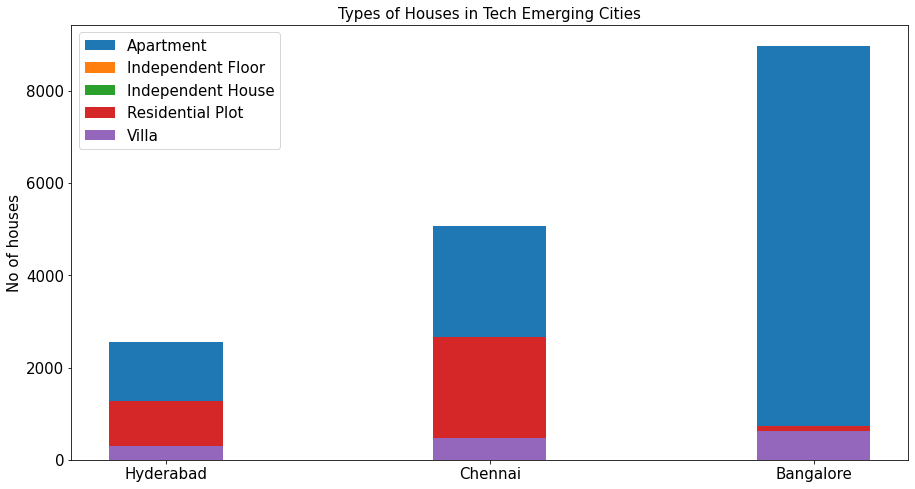

In [10]:
ptypes = hyderabad.groupby('Property_type').size().index.get_level_values(0).tolist()
d1 = hyderabad.groupby('Property_type').size().reset_index(name='Count').Count.values.tolist()
lists = []
for i in ptypes:
    lists.append([len(hyderabad[hyderabad['Property_type'] == i]), len(chennai[chennai['Property_type'] == i]), len(bangalore[bangalore['Property_type'] == i])])
labels = ['Hyderabad', 'Chennai', 'Bangalore']
fig, ax = plt.subplots(figsize=(15, 8))
width = 0.35
for i in range(0, len(ptypes)):
    ax.bar(labels, lists[i], width, label=ptypes[i])
ax.legend(fontsize=15)
plt.ylabel('No of houses', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Types of Houses in Tech Emerging Cities', fontsize=15)
plt.show()

We observe the distribution of different types of properties in these cities using stacked bar graph. It can be observed that Apartments are the major constituent of all the properties in Bangalore whereas Residential Plots are a significant portion in Chennai. All the cities have a small proportion of villas and negligible Independent houses.

#### 4. Area Vs Median Price in Tech-Emerging Cities

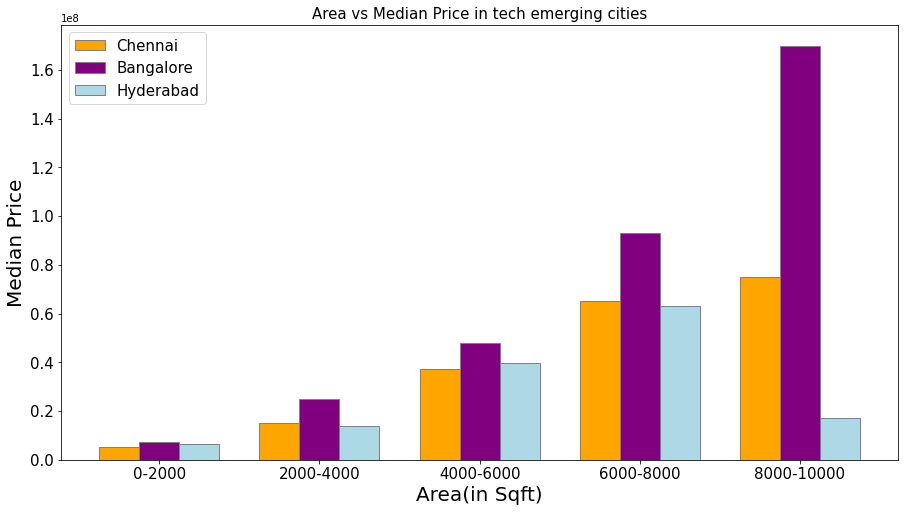

In [61]:
import numpy as np
barWidth = 0.25
ch = []
blr = []
hyd = []
for i in range(0, 10000, 2000):
    hyd.append(hyderabad[(hyderabad['Size'] < i+2000) & (hyderabad['Size'] >= i)].Price.median())
    ch.append(chennai[(chennai['Size'] < i+2000) & (chennai['Size'] >= i)].Price.median())
    blr.append(bangalore[(bangalore['Size'] < i+2000) & (bangalore['Size'] >= i)].Price.median())

br1 = np.arange(len(ch))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.figure(figsize=(15, 8))
plt.bar(br1, ch, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Chennai')
plt.bar(br2, blr, color ='purple', width = barWidth,
        edgecolor ='grey', label ='Bangalore')
plt.bar(br3, hyd, color ='lightblue', width = barWidth,
        edgecolor ='grey', label ='Hyderabad')
plt.xticks([r + barWidth for r in range(len(ch))],
        ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000'])
plt.xlabel('Area(in Sqft)', fontsize=20)
plt.ylabel('Median Price', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Area vs Median Price in tech emerging cities', fontsize=15)
plt.legend(fontsize=15)
plt.show()

We observe the Median price of houses according to area of the property in these cities. For large area properties(8000-10000 sqft), Bangalore is the most expensive place while Hyderabad is the Cheapest. Among different size groups, bangalore is always expensive that the other cities. Hyderabad is always an economical option in terms of size of the property.

#### 5. Property Type Vs Median Price in Tech-Emerging Cities

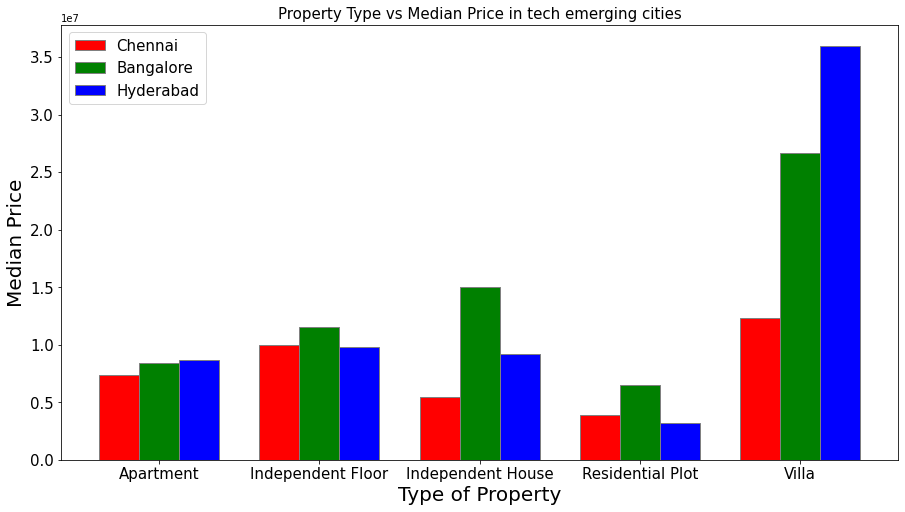

In [49]:
ptypes = chennai.groupby('Property_type').size().reset_index(name='Size').Property_type.tolist()
ch = chennai.groupby('Property_type')['Price'].median().reset_index(name='Median_Price').Median_Price.tolist()
blr = bangalore.groupby('Property_type')['Price'].median().reset_index(name='Median_Price').Median_Price.tolist()
hyd = hyderabad.groupby('Property_type')['Price'].median().reset_index(name='Median_Price').Median_Price.tolist()

barWidth = 0.25
plt.figure(figsize=(15, 8))
plt.bar(br1, ch, color ='r', width = barWidth,
        edgecolor ='grey', label ='Chennai')
plt.bar(br2, blr, color ='g', width = barWidth,
        edgecolor ='grey', label ='Bangalore')
plt.bar(br3, hyd, color ='b', width = barWidth,
        edgecolor ='grey', label ='Hyderabad')
plt.xticks([r + barWidth for r in range(len(ch))], ptypes)
plt.xlabel('Type of Property', fontsize=20)
plt.ylabel('Median Price', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Property Type vs Median Price in tech emerging cities', fontsize=15)
plt.legend(fontsize=15)
plt.show()

We observe the Median price of different types of apartments in tech-emerging cities. We can observe tha villas are the most expensive type of property with median price approximately 3.5 Crores in Hyderabad and 2.8 Crores in Bangalore. Residential Plots are the least expensive with median price approximately 0.5 Crores.

Failed Attempts: Scatter Plots did not provide a good visual representation since they are not suitable for such huge overlapping data sets. Normal Bar Plots also do not provide information as is provided by grouped and stacked bar plots since we can simultaneously compare data of different cities in grouped and stacked bar plots.   

## Q3. Some prefer larger area properties with relatively lesser budgets.


#### 1. Area & Price of Properties in Different Cities having price less than the average price and area >= 5000 sqft.

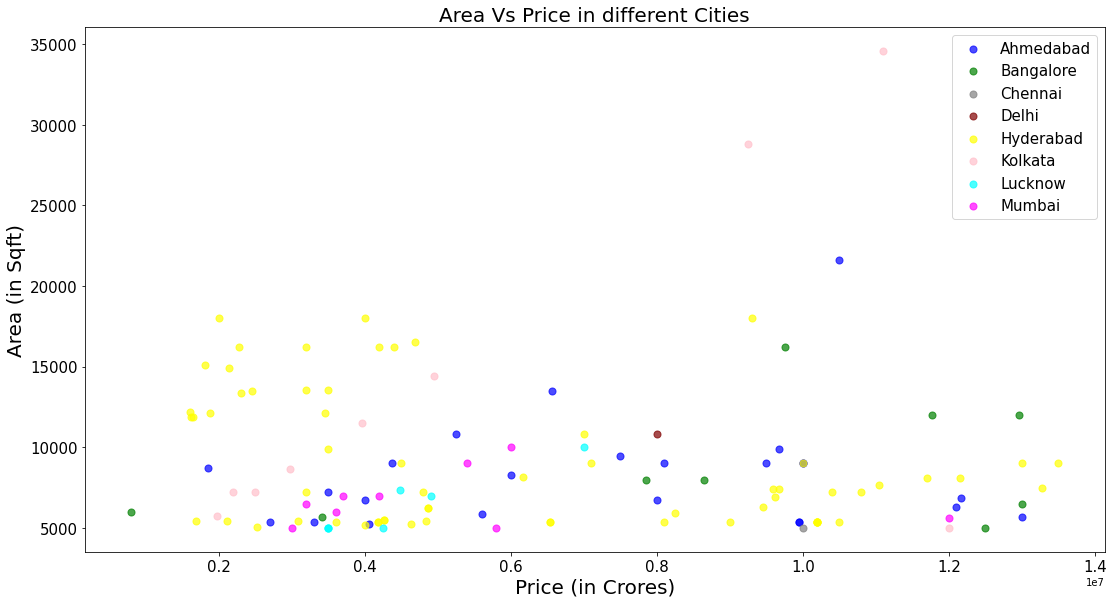

In [72]:
mp = data['Price'].mean()
d1 = data[(data['Price'] <= mp) & (data['Size'] >= 5000)].groupby('City_name')['Price'].apply(list).reset_index(name='Price')
d2 = data[(data['Price'] <= mp) & (data['Size'] >= 5000)].groupby('City_name')['Size'].apply(list).reset_index(name='Size')
d2['Size']
colors = ['blue', 'green', 'grey', 'maroon', 'yellow', 'pink', 'cyan', 'magenta']
plt.figure(figsize=(15, 8))
for i in range(0, len(d2)):
    plt.scatter(d1['Price'][i], d2['Size'][i], label=d1['City_name'][i], color=colors[i], alpha=0.7, s=50)
plt.tight_layout()
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Price (in Crores)', fontsize=20)
plt.ylabel('Area (in Sqft)', fontsize=20)
plt.title('Area Vs Price in different Cities', fontsize=20)
plt.show()

From the above Scatter plot, we can observe properties in various cities which are less than Rs. 1.36 Crore(Average Price) in price and have a size of atleast 5 thousand sqft. It can be observed that Hyderabad & Ahmedabad provides the most number of oppurtunities for such properties whereas other cities have only few such properties. Hence, an investor should look in Hyderabad and Ahmedabad for properties which are large in size and less in price.

#### 2. Types of Properties available having price less than the average price and area >= 5000 sqft.

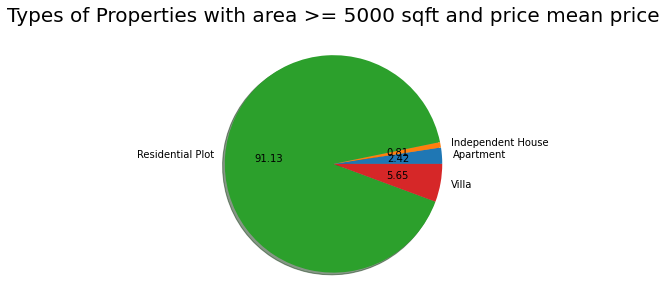

In [73]:
plt.figure(figsize=(15, 5))
d2 = data[(data['Price'] <= mp) & (data['Size'] >= 5000)].groupby('Property_type').size().plot(kind='pie', autopct='%.2f', shadow=True)
plt.ylabel('')
plt.title('Types of Properties with area >= 5000 sqft and price mean price', fontsize=20)
plt.show()

We can observe that 91% properties which are large in size and less in cost are residential plots. A small section is constituted by Apartments, Villas and Independent Houses.

Failed Attempts: We tried to plot using line graph but it is not a good visualization as there is no direct correlation between area and price. Scatter Plot accurately depicts the data by plotting points. Bar graphs also cannot display simultaneously area and price.

## Q4 .Some investors prefer making all the investments in one locality, while some are interested in diversifying the portfolio by assets spread across one city. 

### Visualizations for different localities in a city

#### 1. No of Localities in Different Cities

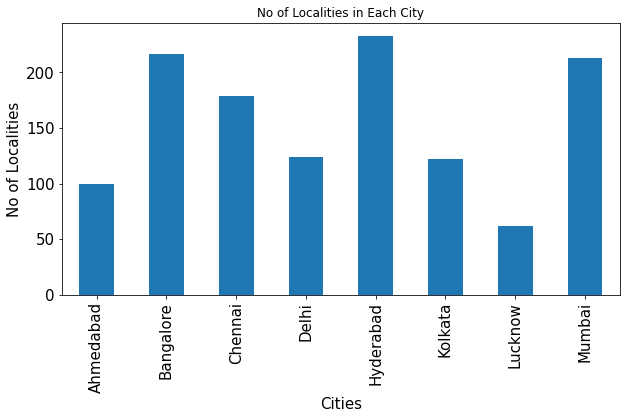

In [14]:
plt.figure(figsize=(10, 5))
localities = data.groupby(['City_name'])['Locality_Name'].nunique().plot(kind='bar')
plt.xlabel('Cities', fontsize=15)
plt.ylabel('No of Localities', fontsize=15)
plt.title('No of Localities in Each City')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### 2. Top 5 Cheapest Localities In Each City

[]

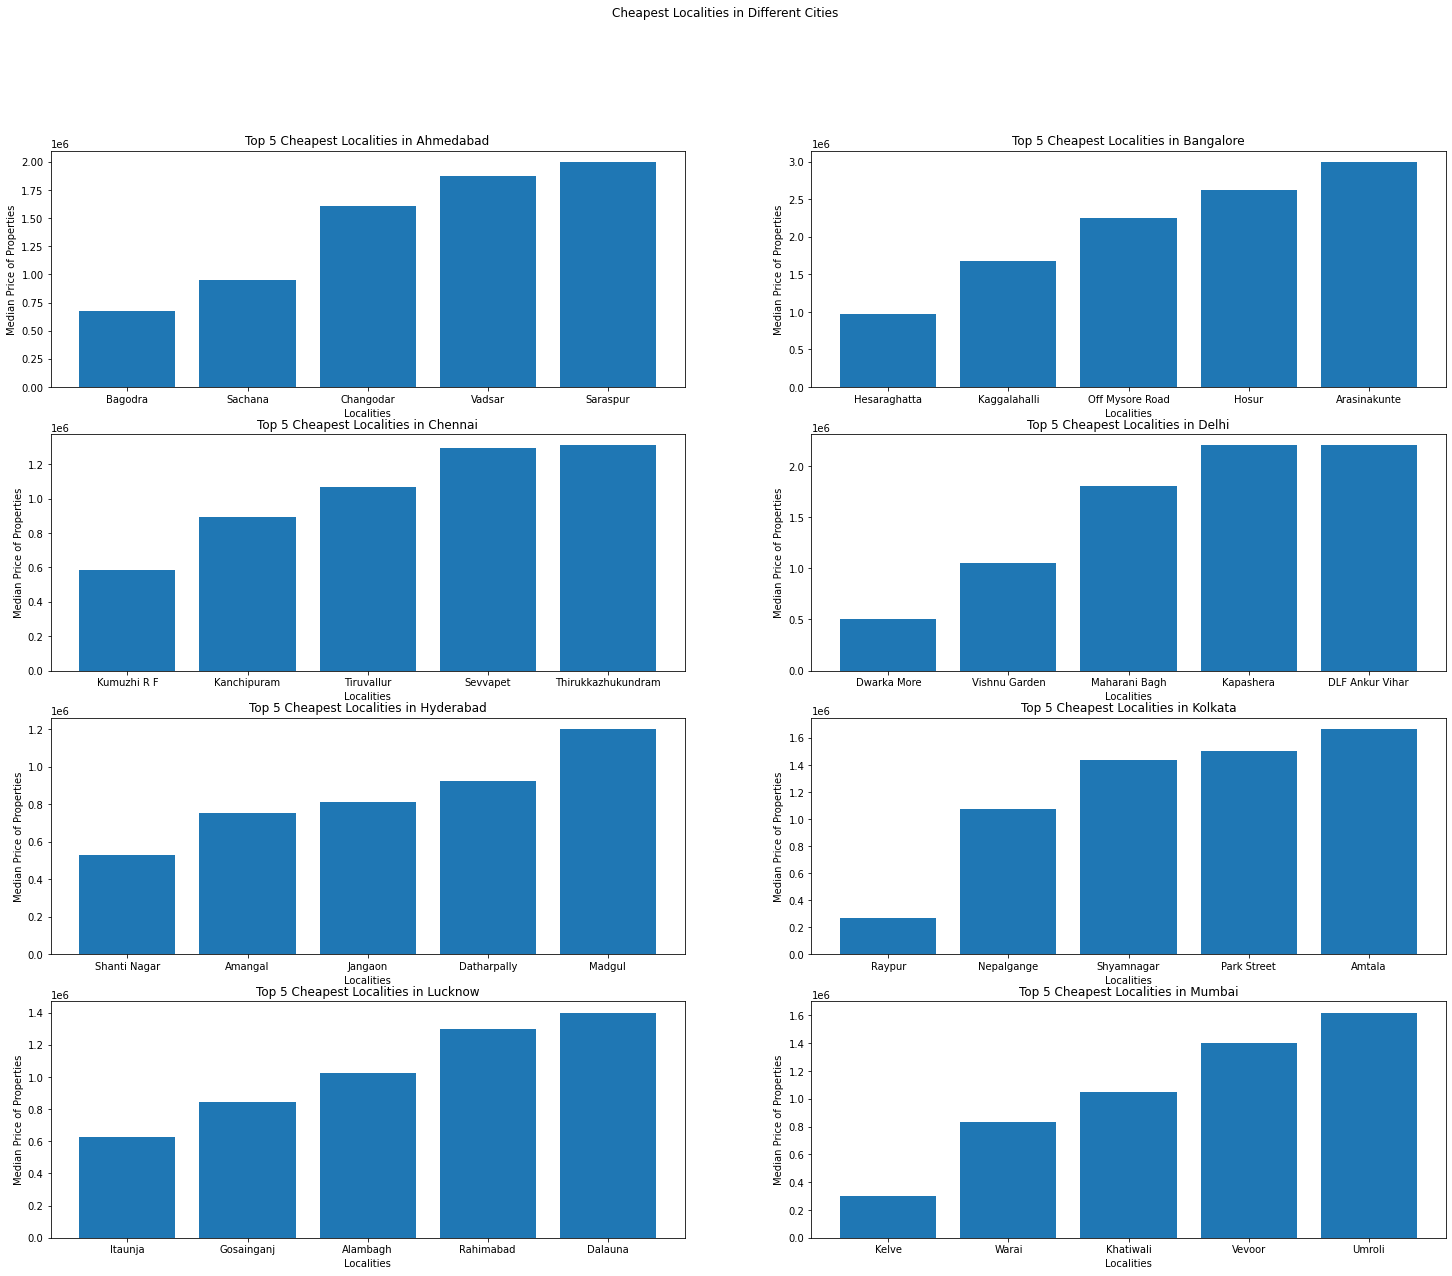

In [122]:
cities = data.groupby('City_name').size().reset_index(name='Price').City_name.values.tolist()
plt.figure(figsize=(25, 20))

for i in range(0, len(cities)):
    cityloc = data[(data['City_name'] == cities[i])]
    locs1 = cityloc.groupby('Locality_Name')['Price'].median().reset_index(name='Price')
    locs1 = locs1.sort_values(by='Price')
    locs1
    d = []
    for j in range(0, 5):
        d.append([locs1.iloc[j][0], locs1.iloc[j][1]])

    columns = list(zip(*d))
    
    plt.subplot(4, 2, i+1)
    plt.bar(columns[0], columns[1])
    plt.xlabel('Localities')
    plt.ylabel('Median Price of Properties')
    plt.title('Top 5 Cheapest Localities in '+cities[i])
plt.suptitle('Cheapest Localities in Different Cities')
plt.plot()

We observe the localities which cost the least to buy a property(according to median price of all properties) in different cities of India.

#### 3. Price and Size of Top 15 Localities(By No of Properties) in a city

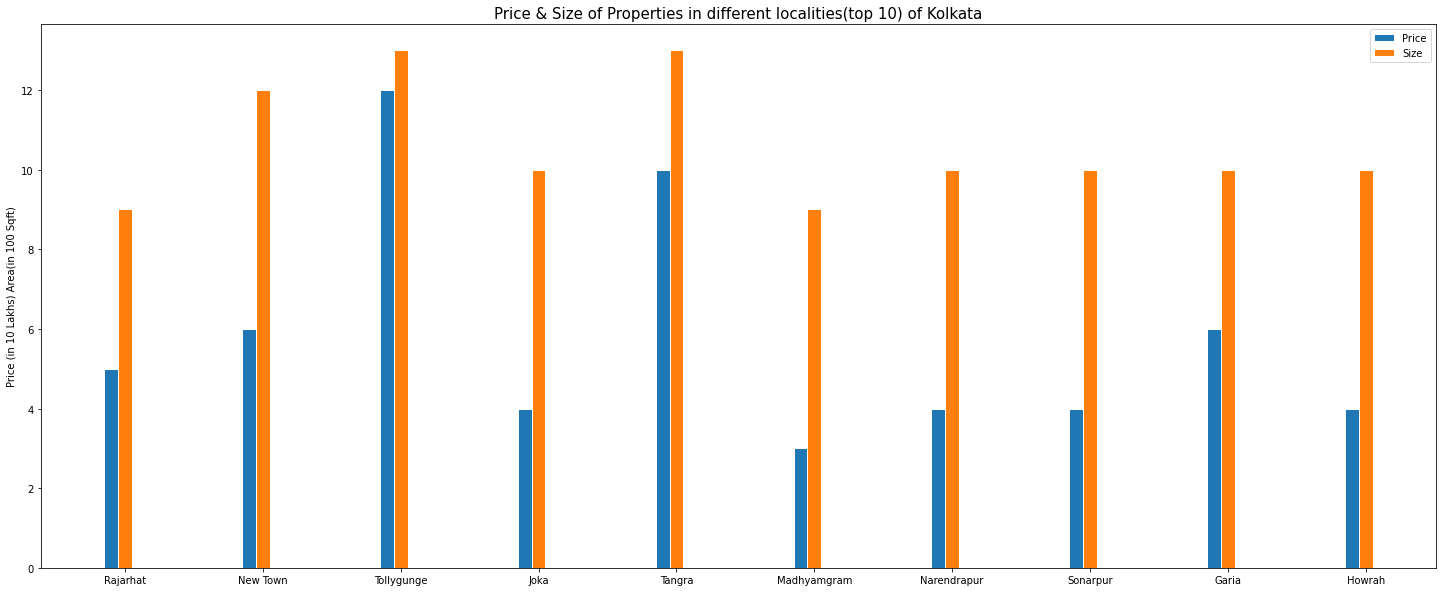

In [75]:
cityinput = 'Kolkata'
cityloc = data[(data['City_name'] == cityinput)]
locs1 = cityloc.groupby('Locality_Name').size().reset_index(name='Count')
locs2 = cityloc.groupby('Locality_Name')['Price'].median().reset_index(name='Price')
locs3 = cityloc.groupby('Locality_Name')['Size'].median().reset_index(name='Size')
d = []
for i in range(0, len(locs1)):
    d.append([locs1.iloc[i][1], locs2.iloc[i][1]//1000000, locs1.iloc[i][0], locs3.iloc[i][1]//100])

barWidth = 0.25
d.sort(reverse=True)
d = d[:10]
columns = list(zip(*d))
barWidth = 0.1
r1 = np.arange(len(d))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(25, 10))
plt.bar(r1, columns[1], width = barWidth, edgecolor='white', label='Price')
plt.bar(r2, columns[3], width = barWidth, edgecolor='white', label='Size')
plt.xticks([r + barWidth for r in range(len(d))], columns[2])
plt.ylabel('Price (in 10 Lakhs) Area(in 100 Sqft)')
plt.title('Price & Size of Properties in different localities(top 10) of '+cityinput, fontsize=15)
plt.legend()
plt.show()

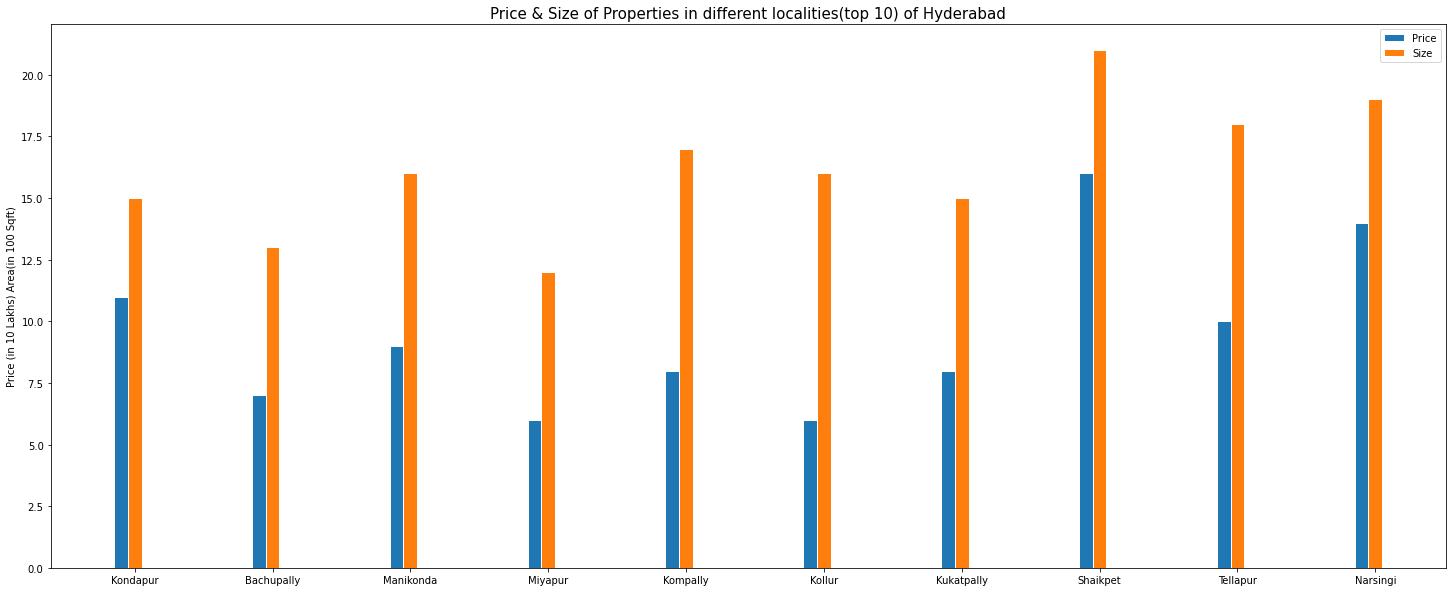

In [76]:
cityinput = 'Hyderabad'
cityloc = data[(data['City_name'] == cityinput)]
locs1 = cityloc.groupby('Locality_Name').size().reset_index(name='Count')
locs2 = cityloc.groupby('Locality_Name')['Price'].median().reset_index(name='Price')
locs3 = cityloc.groupby('Locality_Name')['Size'].median().reset_index(name='Size')
d = []
for i in range(0, len(locs1)):
    d.append([locs1.iloc[i][1], locs2.iloc[i][1]//1000000, locs1.iloc[i][0], locs3.iloc[i][1]//100])

barWidth = 0.25
d.sort(reverse=True)
d = d[:10]
columns = list(zip(*d))
barWidth = 0.1
r1 = np.arange(len(d))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(25, 10))
plt.bar(r1, columns[1], width = barWidth, edgecolor='white', label='Price')
plt.bar(r2, columns[3], width = barWidth, edgecolor='white', label='Size')
plt.xticks([r + barWidth for r in range(len(d))], columns[2])
plt.ylabel('Price (in 10 Lakhs) Area(in 100 Sqft)')
plt.title('Price & Size of Properties in different localities(top 10) of '+cityinput, fontsize=15)
plt.legend()
plt.show()

We can observe the median price and median area of properties in top 15 localities(by no of properties) in any city.

Failed Attempts: We tried using ungrouped bar plots which does not provide simultaneous comparison of area and price for a given locality.

### Visualisations for a particular Locality

#### 4. Size Vs Price for a particular Locality
#### 5. Size Vs BHK for a particular Locality

214


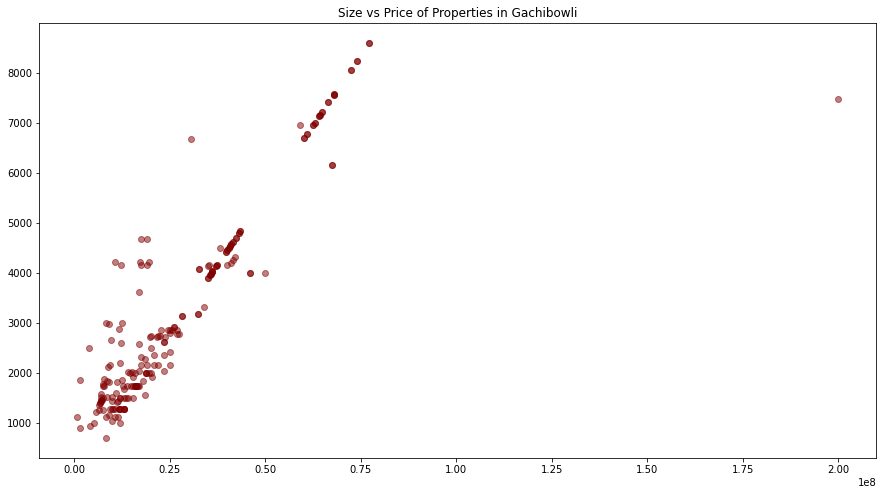

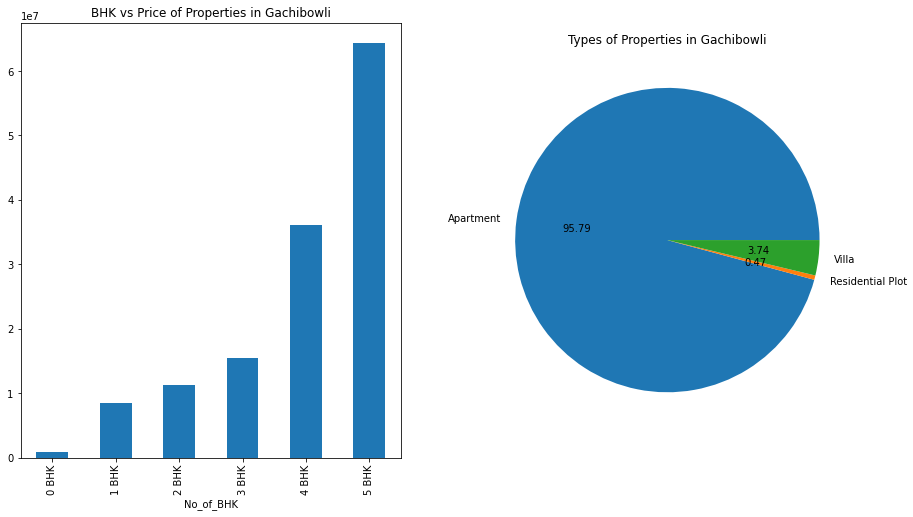

In [17]:
plt.figure(figsize=(15, 8))
locnameinput = 'Gachibowli'
locdata = data[(data['Locality_Name'] == locnameinput)]
print(len(locdata))
plt.scatter(locdata['Price'], locdata['Size'], color='maroon', alpha=0.5)
plt.title('Size vs Price of Properties in '+locnameinput)
plt.show()
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
locdata.groupby('No_of_BHK')['Price'].median().plot(kind='bar')
plt.title('BHK vs Price of Properties in '+locnameinput)
plt.subplot(1, 2, 2)
locdata.groupby('Property_type').size().plot(kind='pie', autopct='%.2f')
plt.title('Types of Properties in '+locnameinput)
plt.ylabel('')
plt.show()

Failed Attempts: We tried to plot with all the localities in a city but it makes the graph very hard to read since there are many(avg 100) localities in a city.

## Q5. Some investors are interested in knowing the hotspot for their offices in Mumbai and Ahmedabad. 

#### 1. Top Localities in Mumbai & Ahmedabad

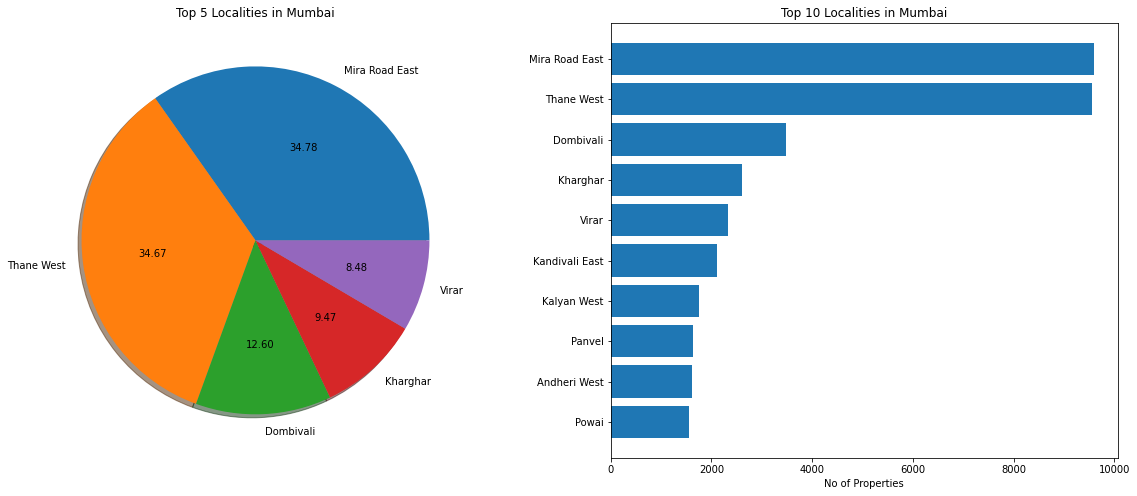

In [18]:
allmumbai = data[(data['City_name'] == 'Mumbai')]
locmum = allmumbai.groupby('Locality_Name').size()
tot = locmum.sum()
locmum = locmum.sort_values(ascending=False)
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
locmum.head().plot(kind='pie', ylabel='Localities', title='Top 5 Localities in Mumbai', autopct='%.2f', shadow=True)
plt.ylabel('')
plt.subplot(1, 2, 2)
n = allmumbai.groupby('Locality_Name').size().reset_index(name='Count')
locmum = n.sort_values(by='Count')
a = locmum.Locality_Name.values.tolist()
d = locmum.Count.values.tolist()
plt.barh(a[-10:], d[-10:])
plt.xlabel('No of Properties')
plt.title('Top 10 Localities in Mumbai')
plt.show()

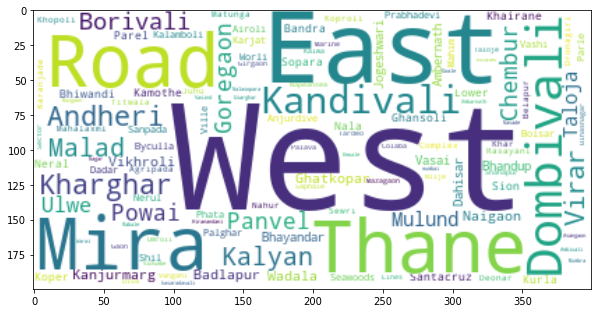

In [19]:
from wordcloud import WordCloud
list1 = allmumbai['Locality_Name'].tolist()
text = ''
for i in range(0, len(list1)):
    text += " " + list1[i]
text
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

We observe that Mira Road East and Thane West have the highest no of properties in Mumbai.

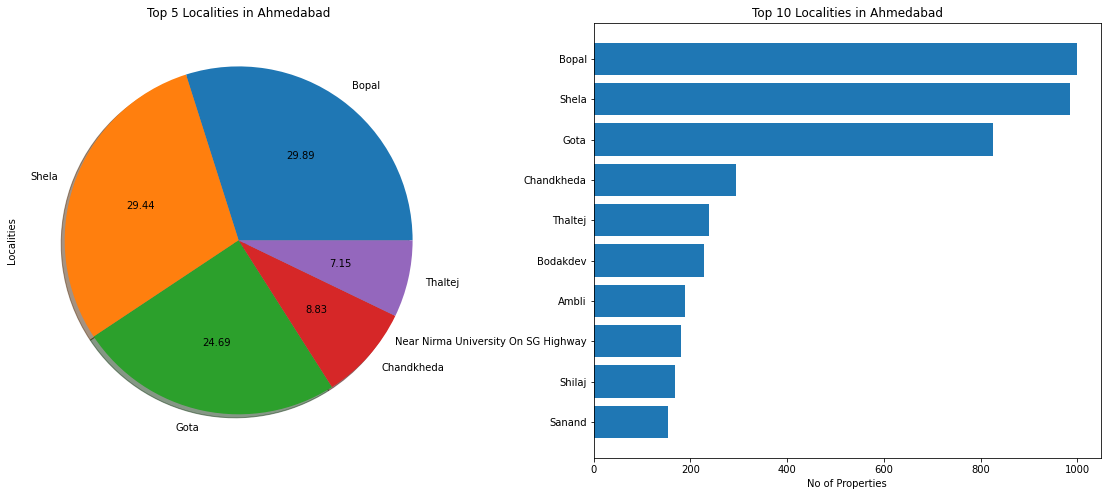

In [20]:
allahmedabad = data[(data['City_name'] == 'Ahmedabad')]
locahm = allahmedabad.groupby('Locality_Name').size()
tot = locahm.sum()
locahm = locahm.sort_values(ascending=False)
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
locahm.head().plot(kind='pie', ylabel='Localities', title='Top 5 Localities in Ahmedabad', autopct='%.2f', shadow=True)
plt.subplot(1, 2, 2)
n = allahmedabad.groupby('Locality_Name').size().reset_index(name='Count')
locahm = n.sort_values(by='Count')
a = locahm.Locality_Name.values.tolist()
a2 = a[-10:]
d = locahm.Count.values.tolist()
d2 = d[-10:]
plt.barh(a2, d2)
plt.xlabel('No of Properties')
plt.title('Top 10 Localities in Ahmedabad')
plt.show()

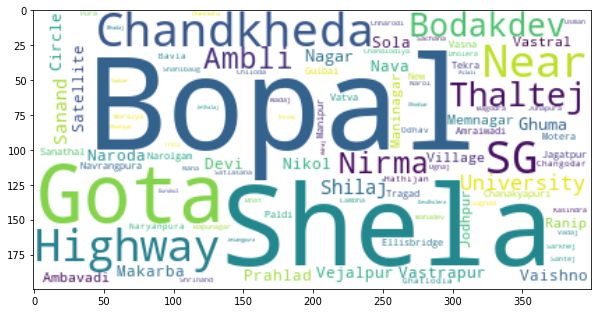

In [21]:
list2 = allahmedabad['Locality_Name'].tolist()
text = ''
for i in range(0, len(list2)):
    text += " " + list2[i]
text
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(10, 10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

We observe that Bopal has the highest no of properties in Ahmedabad closely followed by Shela and Gota. Moreover, the properties are spread out all over the city rather than at a particular location.

Failed Attempts: Plotting all localities and their property counts leads to a long graph which is not suitable to interpret. Instead word cloud shows distribution of localities according to the word size in a presentable way. The larger the word, the more properties it has.